<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2022</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [5]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

random_state = 957

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [7]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [8]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

 Посмотрим сначала на 10 верхних строчек датасета


In [9]:
train.head(n=10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


Затем на 10 нижних

In [10]:
train.tail(n=10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5272,36,54.45,1893.5,Female,0,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Mailed check,0
5273,60,104.35,6339.45,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
5274,2,69.75,144.55,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1
5275,21,19.95,416.4,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0
5276,72,98.20,7015.9,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


И на 10 случайных строчек

In [11]:
train.sample(n=10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4817,68,90.80,6302.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
1543,56,52.00,2884.9,Male,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,0
478,70,66.00,4891.5,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Electronic check,0
1767,1,20.50,20.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
5166,65,99.35,6347.55,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Electronic check,0
4841,10,19.30,185.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
500,65,105.50,6985.65,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
5040,17,55.85,937.5,Female,0,No,Yes,Yes,Yes,DSL,No,No,Yes,No,No,No,One year,Yes,Mailed check,1
2741,60,80.55,4847.05,Female,0,No,No,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),0
2783,44,24.85,1013.6,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [13]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [14]:
train['IsSeniorCitizen'].unique()

array([0, 1])

В датасете на текущий момент отсутствуют незаполненные значения. При этом у нас есть колонка TotalSpent, имеющая тип object, в которой фактически содержатся численные значения, а также колонка IsSeniorCitizen, в которой содержатся только нули и единицы, и которая является по сути категориальной. Исправим эти две колонки и проверим, появились ли NaN значения в результате.

In [15]:
def transform_columns(data: pd.DataFrame) -> None:
  data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
  data['IsSeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [16]:
transform_columns(train)
transform_columns(test)

In [17]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

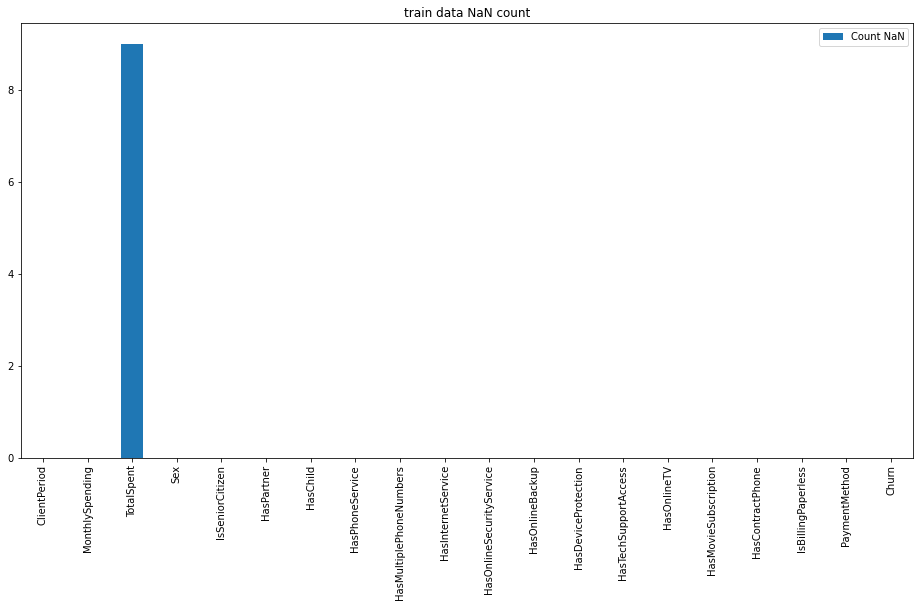

In [18]:
nan_df = pd.DataFrame(train.isna().sum(), columns=['Count NaN'])
nan_df.plot(kind="bar", figsize=(16, 8), title='train data NaN count')

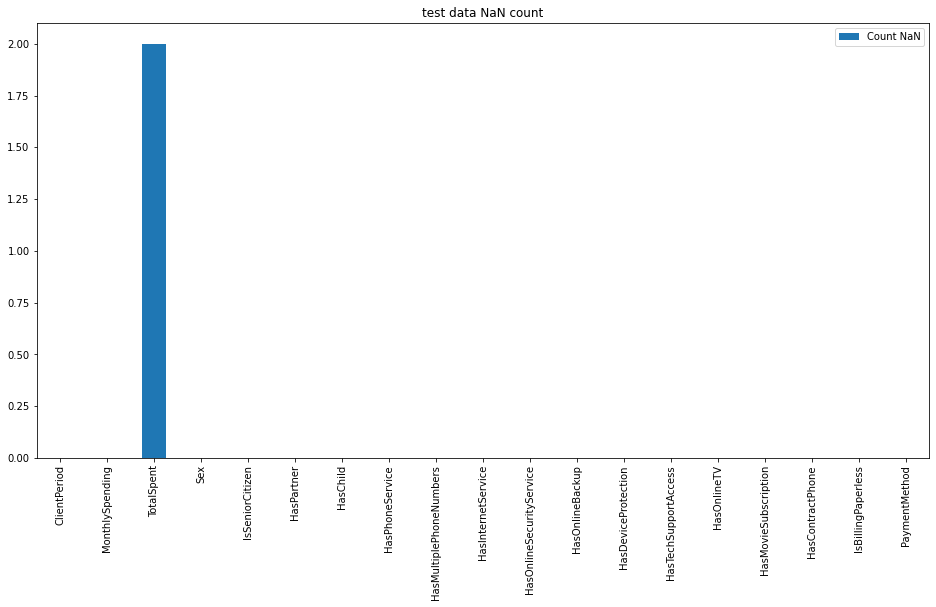

In [19]:
nan_df = pd.DataFrame(test.isna().sum(), columns=['Count NaN'])
nan_df.plot(kind="bar", figsize=(16, 8), title='test data NaN count')

In [20]:
train['TotalSpent'].fillna(0.0, inplace=True)
test['TotalSpent'].fillna(0.0, inplace=True)

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном графике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

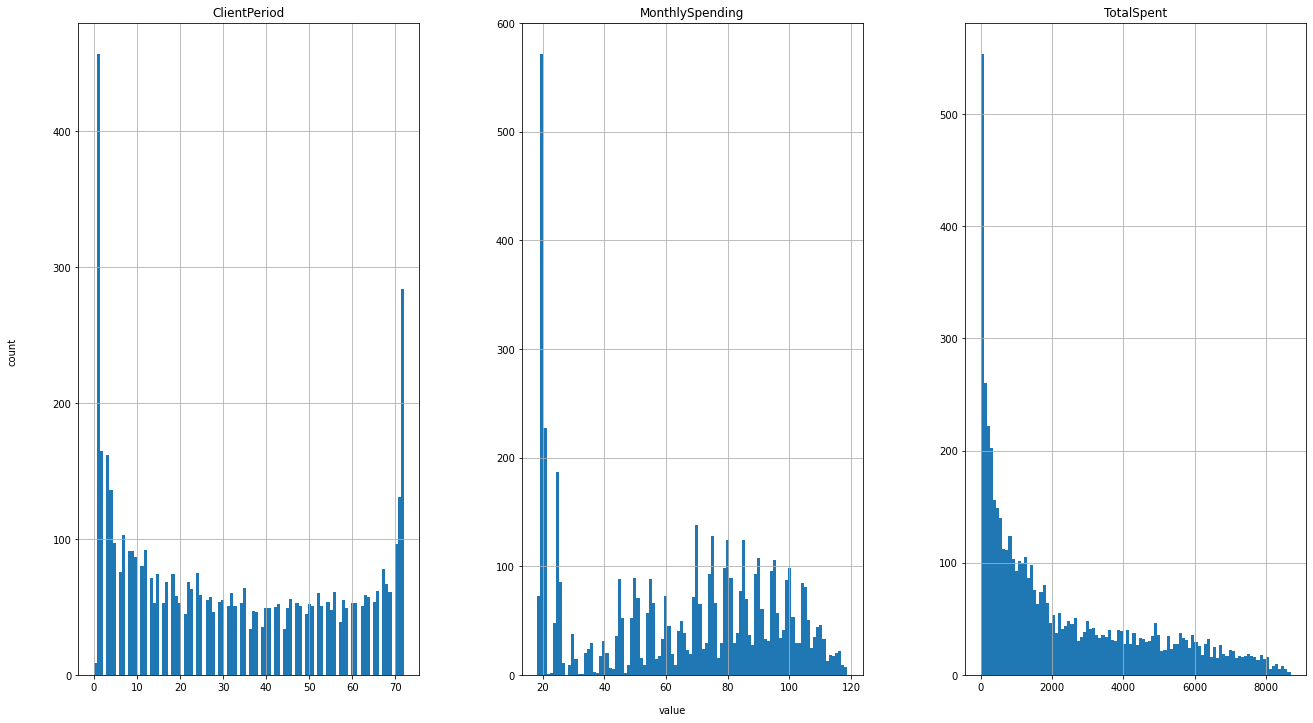

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (22, 12))

train[num_cols].hist(bins = 100, figsize = (24, 12), ax=axes)
fig.text(0.5, 0.08, 'value', ha='center')
fig.text(0.08, 0.5, 'count', va='center', rotation='vertical')
None

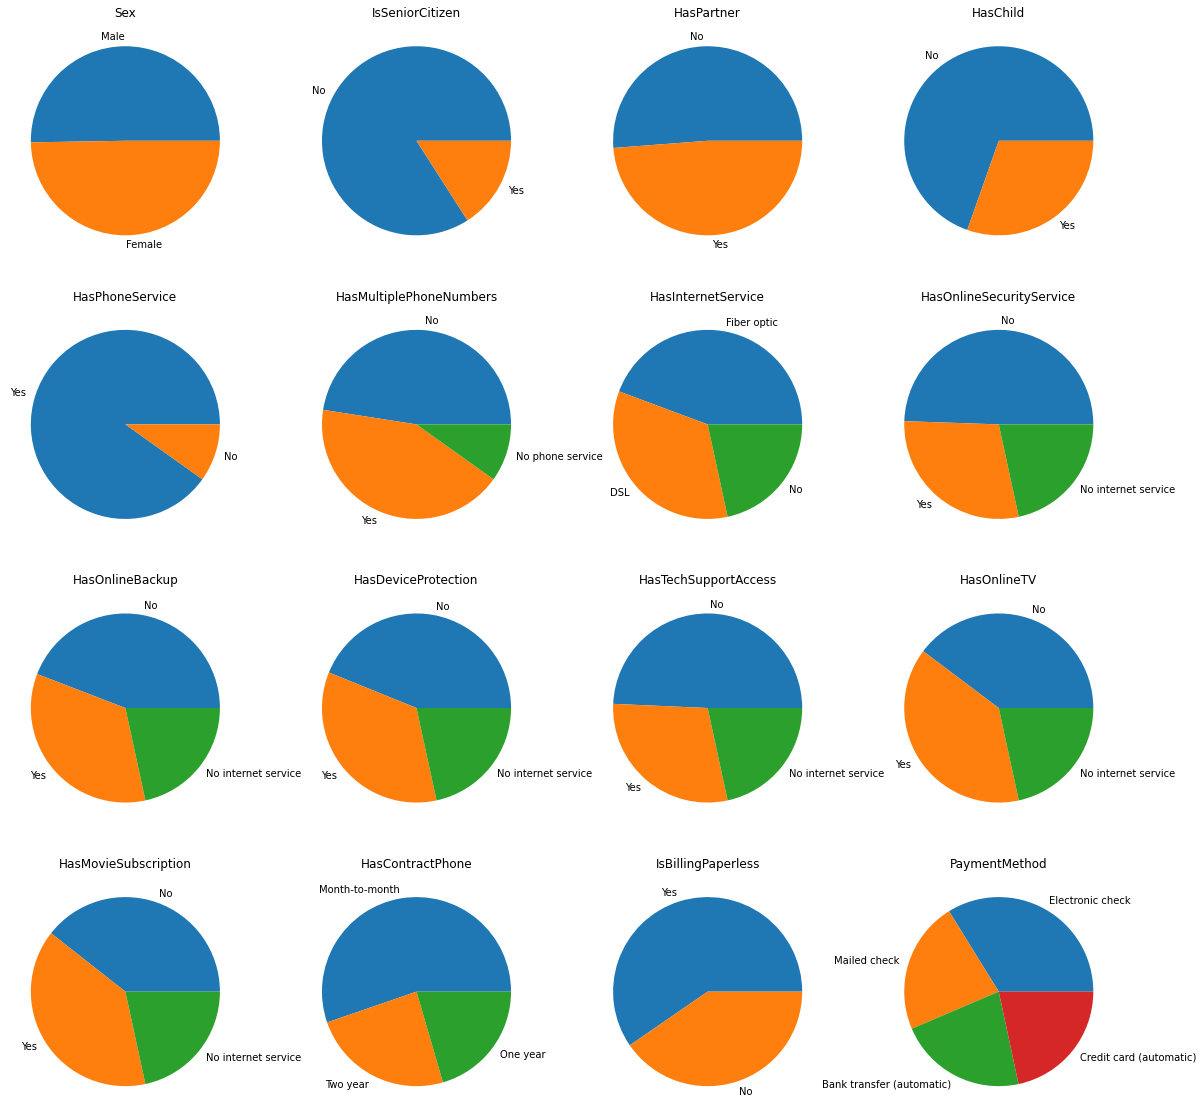

In [22]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax, col in zip(axes.flatten(), cat_cols):
    ax.set_title(col)
    counts = train[col].value_counts()
    labels = counts.index
    ax.pie(counts, labels=labels)

In [23]:
train[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

Ушедшие пользователи составляют всего около четверти от всего датасета. Данные несбалансированны.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Так как у нас есть признаки **HasInternetService** и **HasPhoneService** нам не нужны значения **No phone service** и **No internet service** в датасете. Заменин их на **No**.

In [24]:
replacements = {
  'No internet service': 'No',
  'No phone service': 'No'
}

train.replace(replacements, inplace=True)
test.replace(replacements, inplace=True)

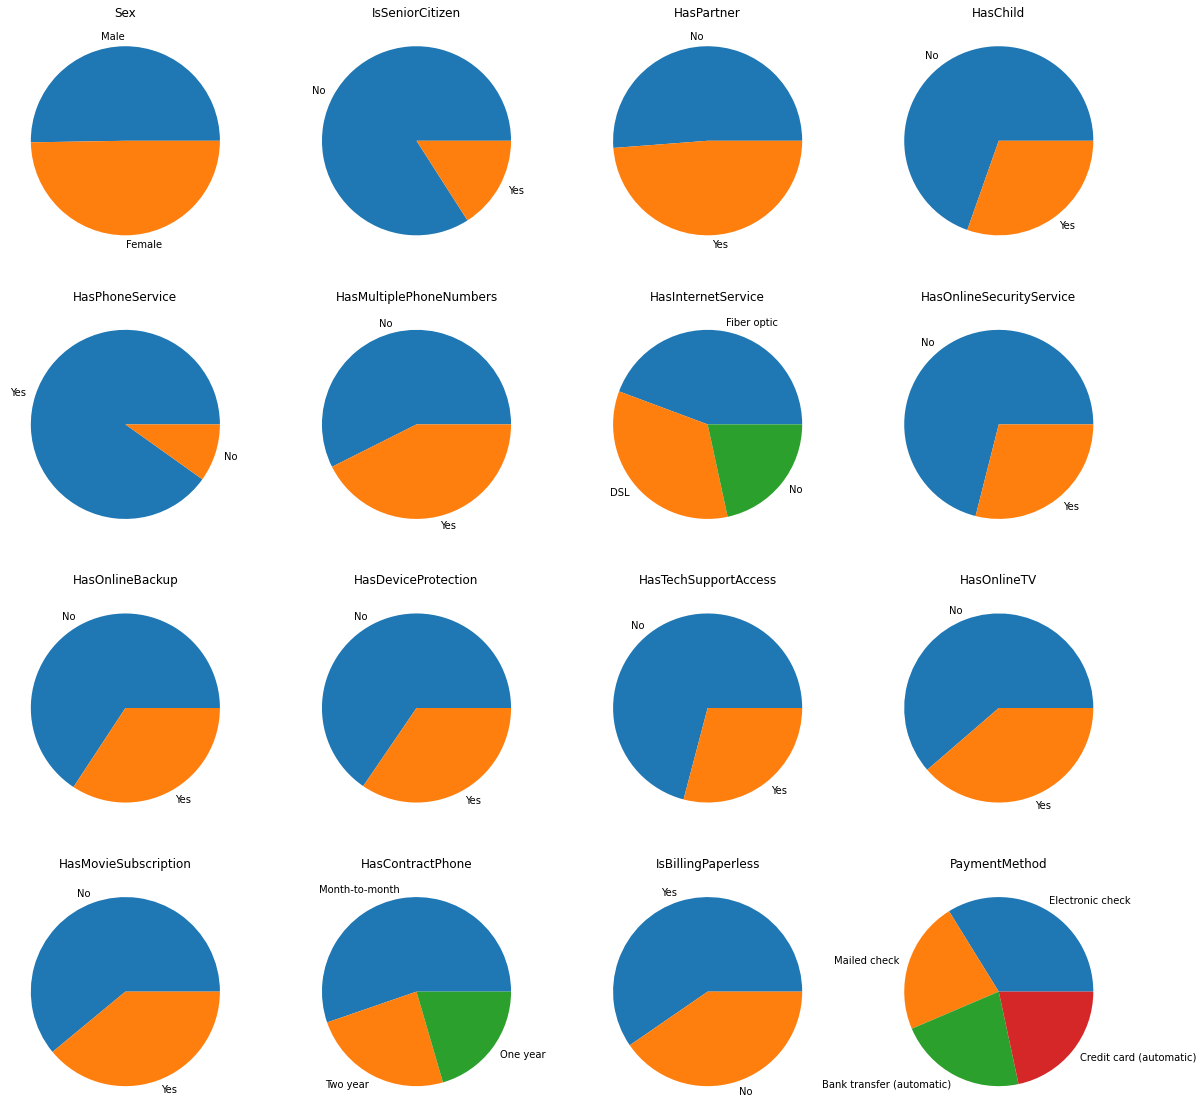

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax, col in zip(axes.flatten(), cat_cols):
    ax.set_title(col)
    counts = train[col].value_counts()
    labels = counts.index
    ax.pie(counts, labels=labels)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [26]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [27]:
X_train, y_train = train[feature_cols], train[target_col]

In [28]:
%%time

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, num_cols),
        ("categorical", categorical_transformer, cat_cols),
    ]
)

model = LogisticRegression(penalty="l1", solver="saga", max_iter=1000, random_state=random_state)

params = {
    "logisticregression__C": [100, 10, 1, 0.1, 0.01, 0.001]
}

clf = make_pipeline(preprocessor, model)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=params,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
    refit=True,
)

log_reg = grid_search.fit(X_train, y_train)

CPU times: user 2.23 s, sys: 119 ms, total: 2.35 s
Wall time: 36.6 s


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [29]:
print(f"best score: {log_reg.best_score_}")
print(f"best params: {log_reg.best_params_}")

best score: 0.8450119259769254
best params: {'logisticregression__C': 10}


In [30]:
logreg_submission = pd.read_csv("./submission.csv")
logreg_submission["Churn"] = log_reg.predict_proba(test)[:, 1]
logreg_submission.to_csv("logreg_submission.csv", index=False)

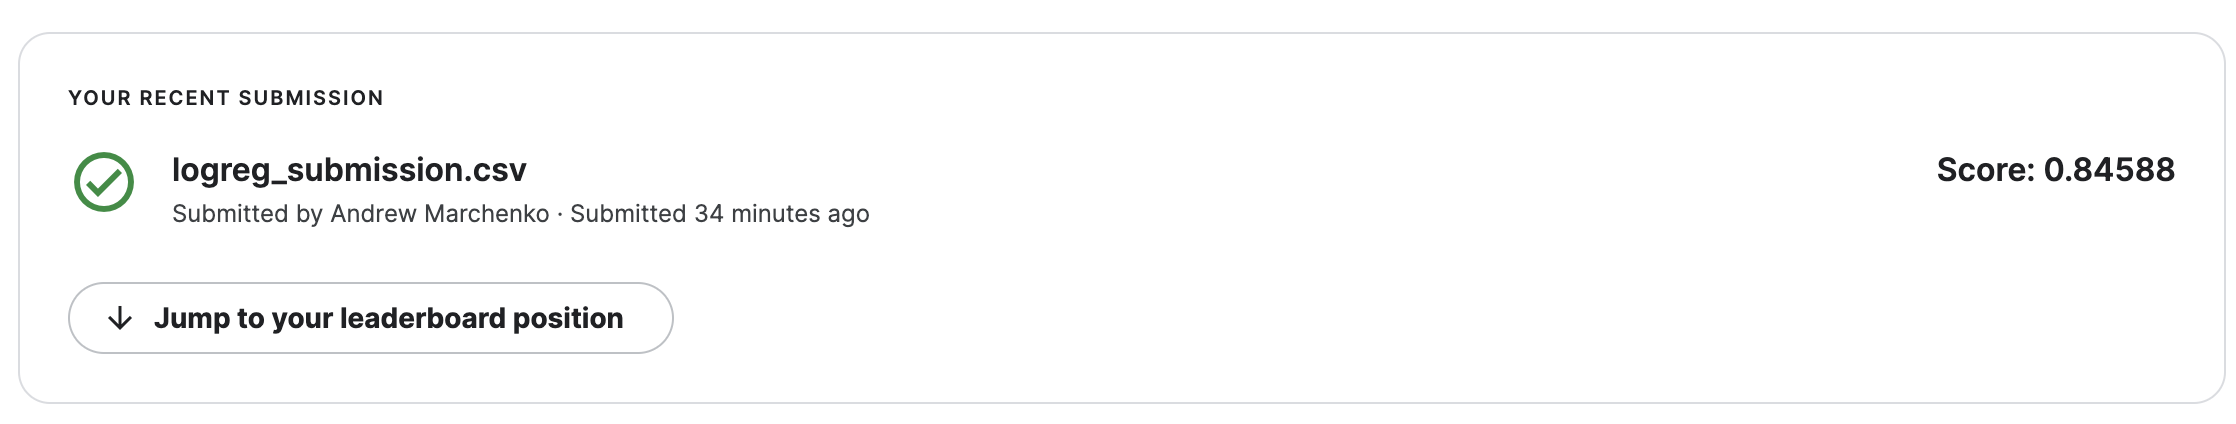

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [31]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


На самом деле мы можем использовать GridSearchCV из пакета catboost непосредственно, поэтому в разделении выборки нет нужды. Будем использовать GridSearchCV для поиска оптимальных параметров. 

In [41]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=100,
    random_seed=random_state,
)

params = {
    "n_estimators": [10, 50, 100],  
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [2, 4, 8],
    "subsample": [0.1, 1, 10],
    "random_strength": [1, 10, 100],
}

catboost.grid_search(params, X_train, y_train, cv=10, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8121035	best: 0.8121035 (0)	total: 63ms	remaining: 15.2s
1:	loss: 0.8499083	best: 0.8499083 (1)	total: 106ms	remaining: 12.7s
2:	loss: 0.8633139	best: 0.8633139 (2)	total: 148ms	remaining: 11.8s
3:	loss: 0.8607990	best: 0.8633139 (2)	total: 351ms	remaining: 21s
4:	loss: 0.8711429	best: 0.8711429 (4)	total: 547ms	remaining: 26s
5:	loss: 0.8637176	best: 0.8711429 (4)	total: 760ms	remaining: 30s
6:	loss: 0.8622965	best: 0.8711429 (4)	total: 1.2s	remaining: 40.6s
7:	loss: 0.8728075	best: 0.8728075 (7)	total: 1.62s	remaining: 47.7s
8:	loss: 0.8601757	best: 0.8728075 (7)	total: 2.05s	remaining: 53.3s
9:	loss: 0.8475224	best: 0.8728075 (7)	total: 2.1s	remaining: 48.9s
10:	loss: 0.8492802	best: 0.8728075 (7)	total: 2.16s	remaining: 45.6s
11:	loss: 0.8504934	best: 0.8728075 (7)	total: 2.21s	remaining: 42.5s
12:	loss: 0.8602855	best: 0.8728075 (7)	total: 2.42s	remaining: 42.9s
13:	loss: 0.8618021	best: 0.8728075 (7)	total: 2.63s	remaining: 43s
14:	loss: 0.8664188	best: 0.8728075 (7)	t

{'params': {'random_strength': 1,
  'depth': 2,
  'iterations': 100,
  'subsample': 0.1,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0, 99],
              'test-AUC-mean': [0.7305209282720413, 0.8465590021126481],
              'test-AUC-std': [0.01965387638726364, 0.01967428042779074],
              'train-AUC-mean': [0.7322158469174492, 0.8525343502966104],
              'train-AUC-std': [0.014364508252304804, 0.0017884380101007237],
              'test-Logloss-mean': [0.65076925656154, 0.4141141561873014],
              'test-Logloss-std': [0.003488239960851351, 0.020213746239463266],
              'train-Logloss-mean': [0.6506485208111288, 0.40675970444956333],
              'train-Logloss-std': [0.002993408992674359,
               0.0020942447671649903]})}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [42]:
from pprint import pprint

print("Best score:", end=' ')
pprint(catboost.best_score_)

best_params = catboost.get_params()
print("Best params:", end=' ')
pprint(best_params)

Best score: {'learn': {'AUC': 0.8513334613570913, 'Logloss': 0.4080965127106183}}
Best params: {'cat_features': ['Sex',
                  'IsSeniorCitizen',
                  'HasPartner',
                  'HasChild',
                  'HasPhoneService',
                  'HasMultiplePhoneNumbers',
                  'HasInternetService',
                  'HasOnlineSecurityService',
                  'HasOnlineBackup',
                  'HasDeviceProtection',
                  'HasTechSupportAccess',
                  'HasOnlineTV',
                  'HasMovieSubscription',
                  'HasContractPhone',
                  'IsBillingPaperless',
                  'PaymentMethod'],
 'depth': 2,
 'eval_metric': 'AUC:hints=skip_train~false',
 'grow_policy': 'Lossguide',
 'iterations': 100,
 'learning_rate': 0.1,
 'logging_level': 'Silent',
 'metric_period': 100,
 'random_seed': 957,
 'random_strength': 1,
 'subsample': 0.1}


In [43]:
catboost_submission = pd.read_csv("./submission.csv")
catboost_submission["Churn"] = catboost.predict_proba(test)[:, 1]
catboost_submission.to_csv("catboost_submission.csv", index=False)

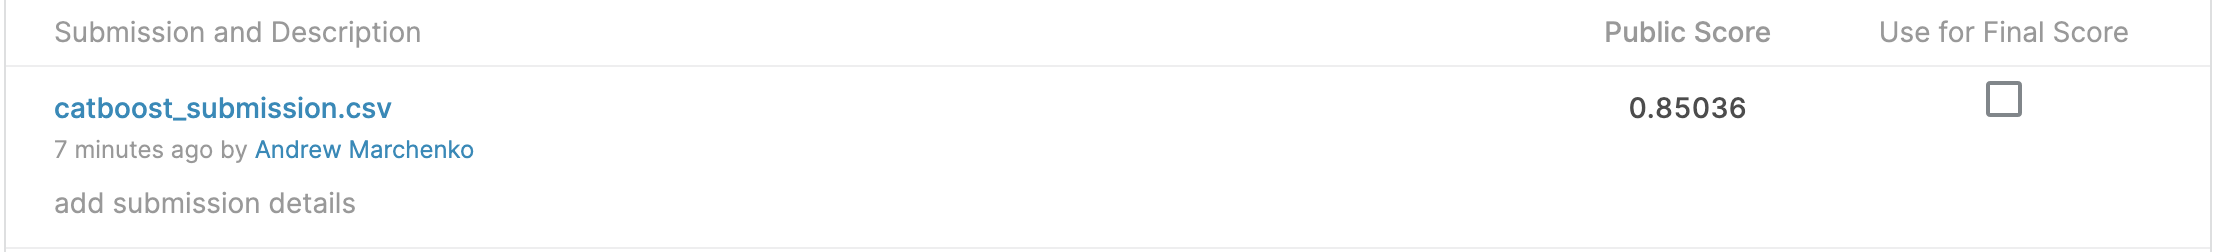

# Предсказания

Попробуем объединить две реализованные модели чтобы улучшить предсказания.

In [45]:
from sklearn.ensemble import StackingClassifier

final_estimator = CatBoostClassifier(
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=random_state,
)

stacking = StackingClassifier(
    estimators=[
        ("log_reg", log_reg),
        ("catboost", catboost),
    ],
    final_estimator=final_estimator,
    n_jobs=-1,
)

stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('log_reg',
                                GridSearchCV(cv=10,
                                             estimator=Pipeline(steps=[('columntransformer',
                                                                        ColumnTransformer(transformers=[('numerical',
                                                                                                         StandardScaler(),
                                                                                                         ['ClientPeriod',
                                                                                                          'MonthlySpending',
                                                                                                          'TotalSpent']),
                                                                                                        ('categorical',
                                                                                  

In [46]:
stacking_submission = pd.read_csv("./submission.csv")
stacking_submission["Churn"] = stacking.predict_proba(test)[:, 1]
stacking_submission.to_csv("stacking_submission.csv", index=False)

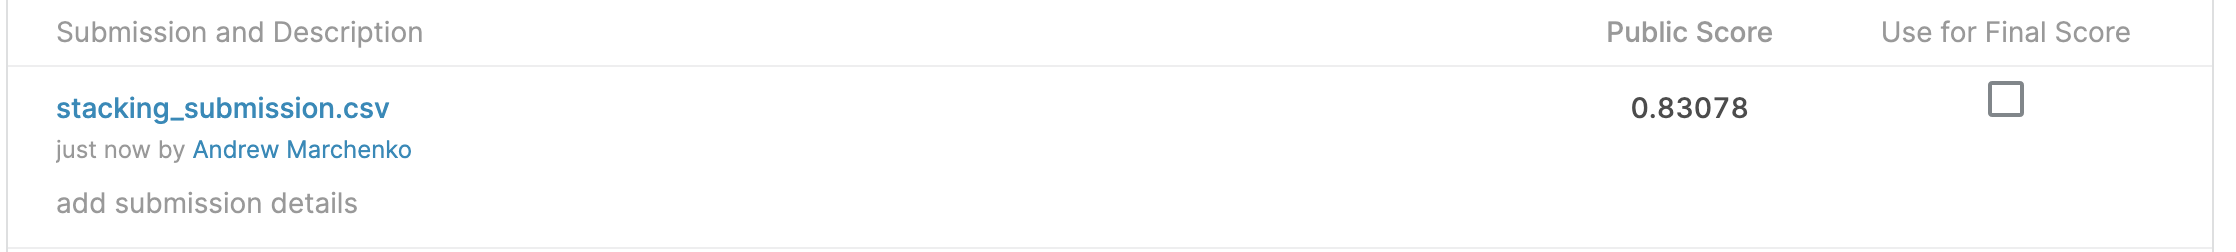

В данном случае мы не смогли улучшить результаты с помощью стекинга. Дело может быть в плохом выборе финального классификатора или в малом количестве моделей для обьединения.


In [47]:
best_model = catboost

In [51]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

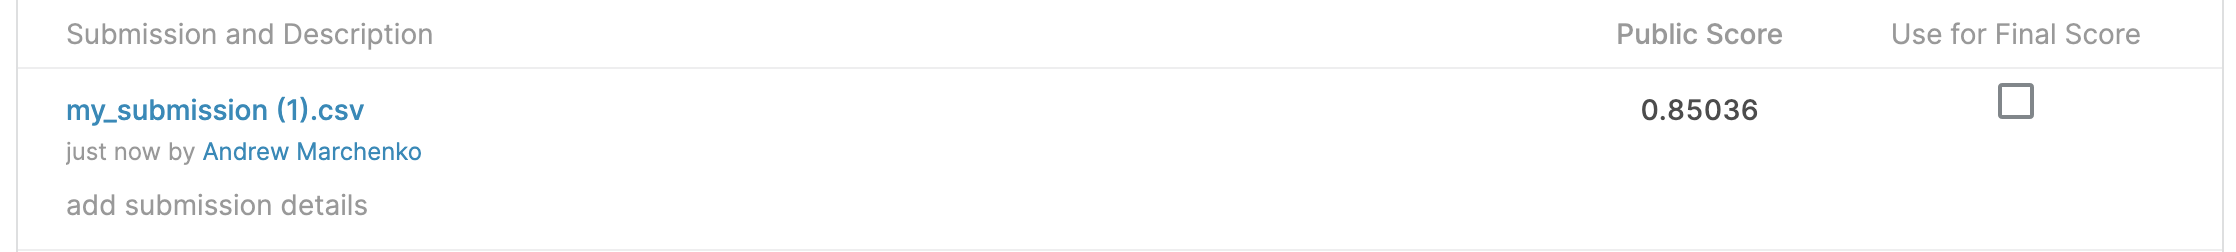

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

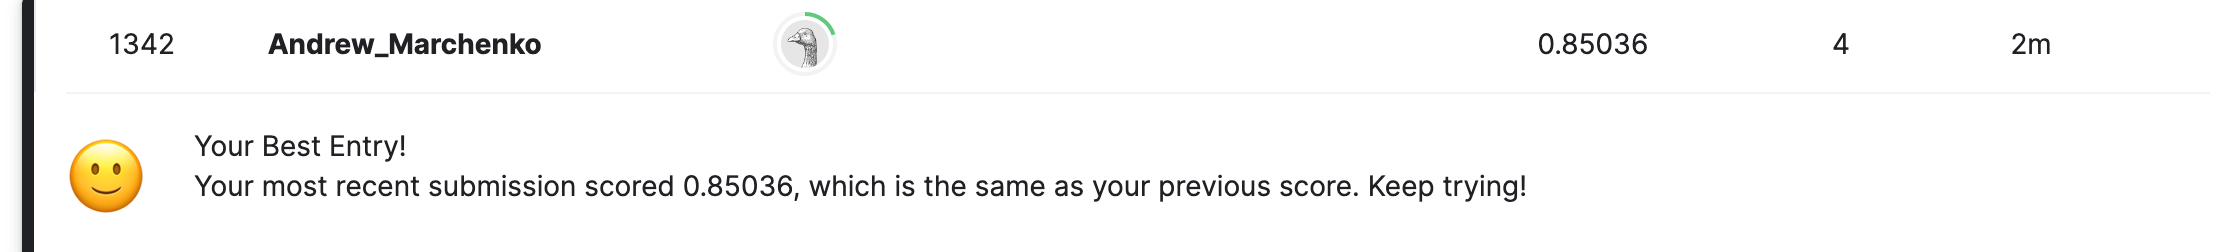